In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Yanuar Ginting
- Email: gintingyanuar@gmail.com
- Id Dicoding: imyanuarginting

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda berdasarkan tahun?
- Bagaimana tren penyewaan sepeda berdasarkan kuartal?
- Bagaimana tren penyewaan sepeda berdasarkan bulan?
- Pada musim apa penyewaan sepeda mengalami permintaan paling banyak dan paling sedikit?
- Pada bulan apa penyewaan sepeda mengalami permintaan paling banyak dan paling sedikit?
- Pada hari kerja atau akhir pekan penyewaan sepeda mengalami permintaan paling banyak dan paling sedikit?
- Pada hari libur atau bukan penyewaan sepeda mengalami permintaan paling banyak dan paling sedikit?
- Pada hari apa penyewaan sepeda mengalami permintaan paling banyak dan paling sedikit?
- Pada cuaca apa penyewaan sepeda mengalami permintaan paling banyak dan paling sedikit?
- Pada jam berapa penyewaan sepeda mengalami permintaan paling banyak dan paling sedikit?
- Apa tipe pengguna paling banyak dalam penyewaan sepeda?

## Menyiapkan semua library yang dibutuhkan

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("drive/MyDrive/Dicoding/Data Scientist/4. Belajar Analisis Data dengan Python/10. Proyek Akhir/Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("drive/MyDrive/Dicoding/Data Scientist/4. Belajar Analisis Data dengan Python/10. Proyek Akhir/Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Checking table `day_df`

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [7]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
print("Number of duplicates: ", day_df.duplicated().sum())

Number of duplicates:  0


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Checking table `hour_df`

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [12]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
print("Number of duplicates: ", hour_df.duplicated().sum())

Number of duplicates:  0


In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [15]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [16]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
303,304,2011-10-31,4,0,10,0,1,1,1,0.340000,0.356063,0.703333,0.106350,362,3307,3669
307,308,2011-11-04,4,0,11,0,5,1,2,0.403333,0.403392,0.622500,0.271779,470,3576,4046
332,333,2011-11-29,4,0,11,0,2,1,2,0.458333,0.451375,0.830833,0.258092,96,2818,2914
476,477,2012-04-21,2,1,4,0,6,0,1,0.570000,0.542921,0.682917,0.283587,2541,4083,6624
237,238,2011-08-26,3,0,8,0,5,1,1,0.700000,0.659733,0.761250,0.083962,768,3893,4661


In [17]:
day_df.describe(include="all")

<ipython-input-17-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


#### Group by `season`

In [18]:
# 1: Springer
# 2: Summer
# 3: Fall
# 4: Winter

day_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
       nunique   max   min         mean          std
season                                              
1          181  7836   431  2604.132597  1399.942119
2          184  8362   795  4992.331522  1695.977235
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261

#### Group by `yr`

In [19]:
# 0: 2011
# 1: 2012

day_df.groupby(by="yr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                               
   nunique   max  min         mean          std
yr                                             
0      365  6043  431  3405.761644  1378.753666
1      366  8714   22  5599.934426  1788.667868

#### Group by `mnth`

In [20]:
# 1: January
# 2: February
# 3: March
# 4: April
# 5: May
# 6: June
# 7: July
# 8: August
# 9: September
# 10: October
# 11: November
# 12: December

day_df.groupby(by="mnth").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
     nunique   max   min         mean          std
mnth                                              
1         62  4521   431  2176.338710  1161.674370
2         57  5062  1005  2655.298246  1145.313307
3         62  8362   605  3692.258065  1899.301812
4         60  7460   795  4484.900000  1776.160778
5         62  8294  2633  5349.774194  1298.711561
6         60  8120  3767  5772.366667  1240.400031
7         62  8173  3285  5563.677419  1273.751871
8         62  7865  1115  5664.419355  1494.516146
9         60  8714  1842  5766.516667  1810.130649
10        62  8156    22  5199.225806  1988.392517
11        60  6852  1495  4247.183333  1285.712709
12        62  6606   441  3403.806452  1549.639353

#### Group by `weekday`

In [21]:
# 0: Sunday
# 1: Monday
# 2: Tuesday
# 3: Wednesday
# 4: Thursday
# 5: Friday
# 6: Saturday

day_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
        nunique   max   min         mean          std
weekday                                              
0           105  8227   605  4228.828571  1872.496629
1           105  7525    22  4338.123810  1793.074013
2           104  7767   683  4510.663462  1826.911642
3           104  8173   441  4548.538462  2038.095884
4           104  7804   431  4667.259615  1939.433317
5           104  8362  1167  4690.288462  1874.624870
6           105  8714   627  4550.542857  2196.693009

### Explore `hour_df`

In [22]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4550,4551,2011-07-13,3,0,7,12,0,3,1,1,0.84,0.7576,0.41,0.2836,40,134,174
15830,15831,2012-10-26,4,1,10,19,0,5,1,2,0.54,0.5152,0.83,0.1642,72,399,471
8225,8226,2011-12-14,4,0,12,9,0,3,1,2,0.30,0.3333,0.61,0.0000,9,230,239
16163,16164,2012-11-11,4,1,11,5,0,0,0,1,0.30,0.3030,0.87,0.1343,0,12,12
7041,7042,2011-10-26,4,0,10,0,0,3,1,1,0.44,0.4394,0.72,0.1940,4,28,32


In [23]:
hour_df.describe(include="all")

<ipython-input-23-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


#### Group by `hr`

In [24]:
# 0: 24:00
# 1: 01:00
# 2: 02:00
# 3: 03:00
# 4: 04:00
# 5: 05:00
# 6: 06:00
# 7: 07:00
# 8: 08:00
# 9: 09:00
# 10: 10:00
# 11: 11:00
# 12: 12:00
# 13: 13:00
# 14: 14:00
# 15: 15:00
# 16: 16:00
# 17: 17:00
# 18: 18:00
# 19: 19:00
# 20: 20:00
# 21: 21:00
# 22: 22:00
# 23: 23:00

hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant  cnt                            
   nunique  max min        mean         std
hr                                         
0      726  283   2   53.898072   42.307910
1      724  168   1   33.375691   33.538727
2      715  132   1   22.869930   26.578642
3      697   79   1   11.727403   13.239190
4      697   28   1    6.352941    4.143818
5      717   66   1   19.889819   13.200765
6      725  213   1   76.044138   55.084348
7      727  596   1  212.064649  161.441936
8      727  839   5  359.011004  235.189285
9      727  426  14  219.309491   93.703458
10     727  539   8  173.668501  102.205413
11     727  663  10  208.143054  127.495536
12     728  776   3  253.315934  145.081134
13     729  760  11  253.661180  148.107657
14     729  750  12  240.949246  147.271574
15     729  750   7  251.233196  144.632541
16     730  783  11  311.983562  148.682618
17     730  976  15  461.452055  232.656611
18     728  977  23  425.510989  224.639304
19     728  743  11  311.523352  161.050359
20     728  567  11  226.030220  119.670164
21     728  584   6  172.314560   89.788893
22     728  502   9  131.335165   69.937782
23     728  256   2   87.831044   50.846889

#### Merge `day_df` and `hour_df`

In [25]:
main_data = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="dteday",
    right_on="dteday"
)

main_data.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Save `main_data` to csv

In [39]:
main_data.to_csv("main_data.csv")

## Visualization & Explanatory Analysis

### Question 1: Bagaimana tren penyewaan sepeda berdasarkan tahun?

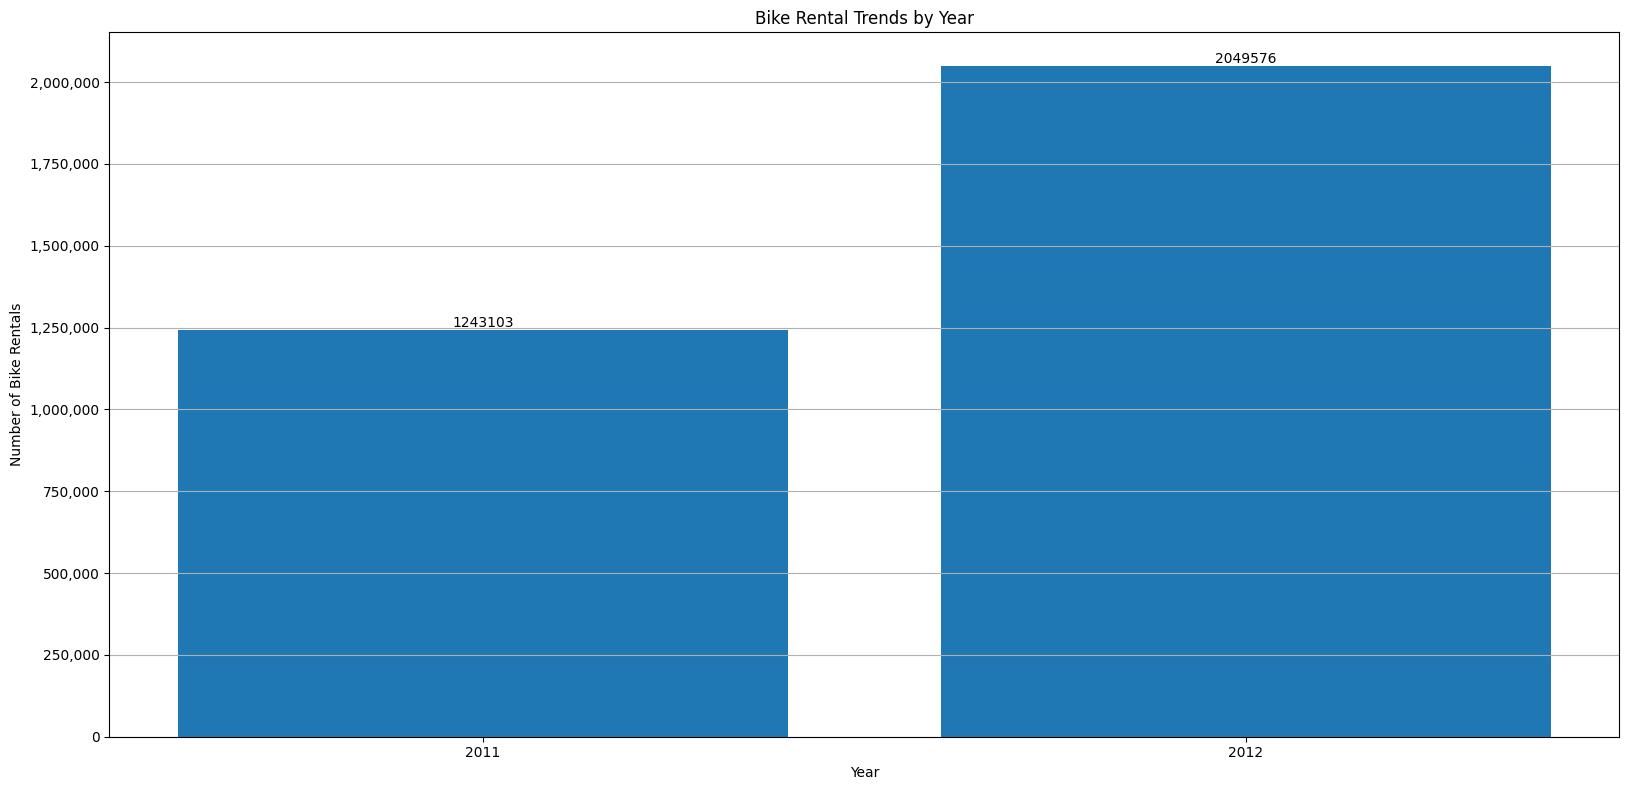

In [27]:
yearly_df = day_df.resample("Y", on="dteday").sum()
yearly_df = yearly_df.reset_index()

yearly_df["dteday"] = ["2011", "2012"]

plt.figure(figsize=(16, 8))
plt.bar(yearly_df["dteday"], yearly_df["cnt"])

for i in range(len(yearly_df["dteday"])):
    plt.text(i, yearly_df["cnt"][i],
             str(yearly_df["cnt"][i]),
             ha="center", va="bottom")

plt.title("Bike Rental Trends by Year")
plt.xlabel("Year")
plt.ylabel("Number of Bike Rentals")

plt.grid(axis="y")
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(
    plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}")
)
plt.show()

### Question 2: Bagaimana tren penyewaan sepeda berdasarkan kuartal?

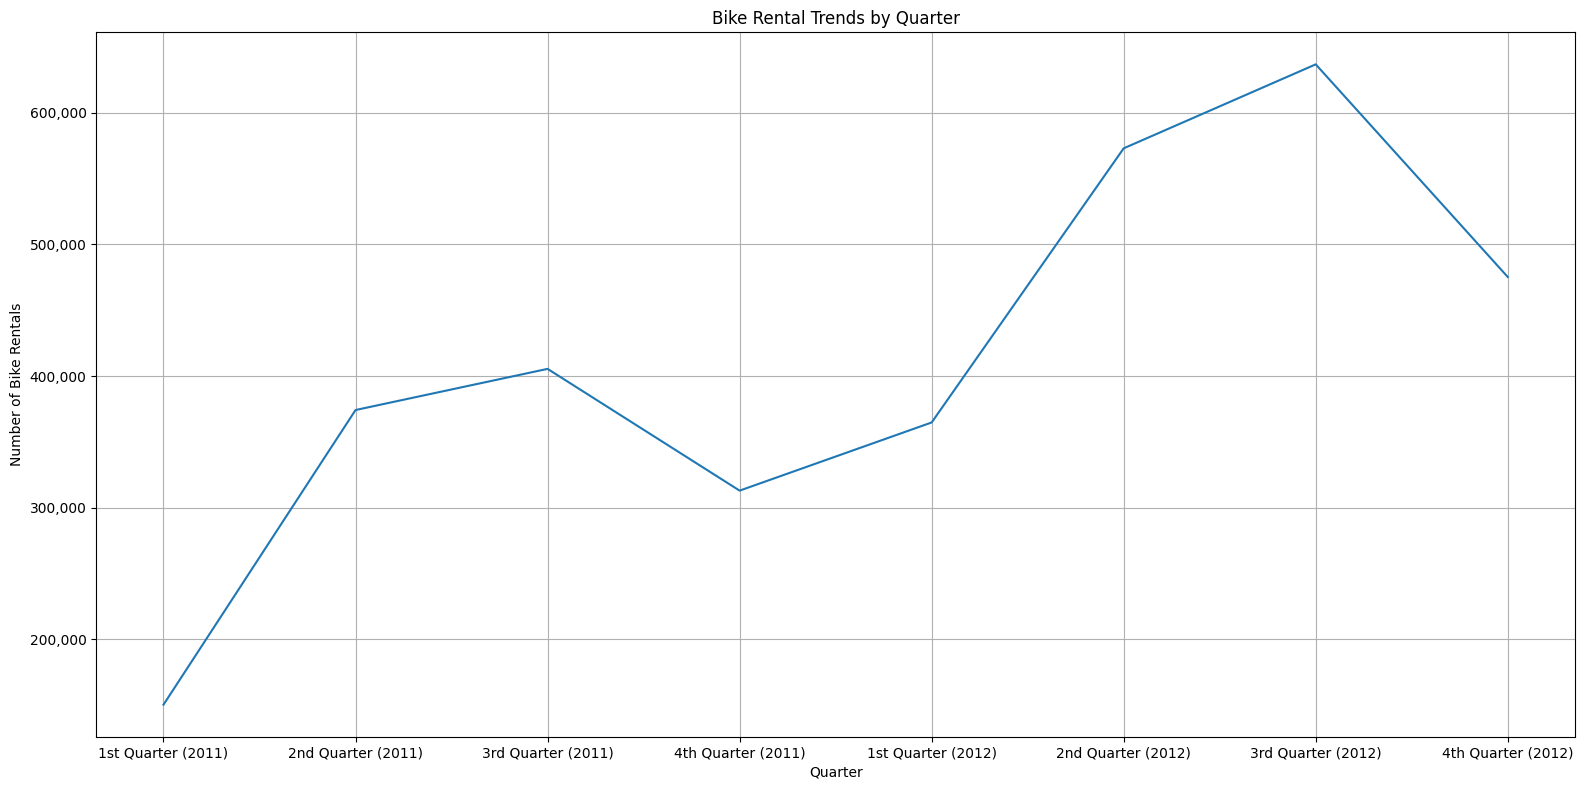

In [28]:
quarterly_df = day_df.resample("Q", on="dteday").sum()
quarterly_df = quarterly_df.reset_index()

quarterly_df["dteday"] = ["1st Quarter (2011)", "2nd Quarter (2011)",
                          "3rd Quarter (2011)", "4th Quarter (2011)",
                          "1st Quarter (2012)", "2nd Quarter (2012)",
                          "3rd Quarter (2012)", "4th Quarter (2012)"]

plt.figure(figsize=(16, 8))
plt.plot(quarterly_df["dteday"], quarterly_df["cnt"])

plt.title("Bike Rental Trends by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Number of Bike Rentals")

plt.grid(True)
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(
    plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}")
)
plt.show()

### Question 3: Bagaimana tren penyewaan sepeda berdasarkan bulan?

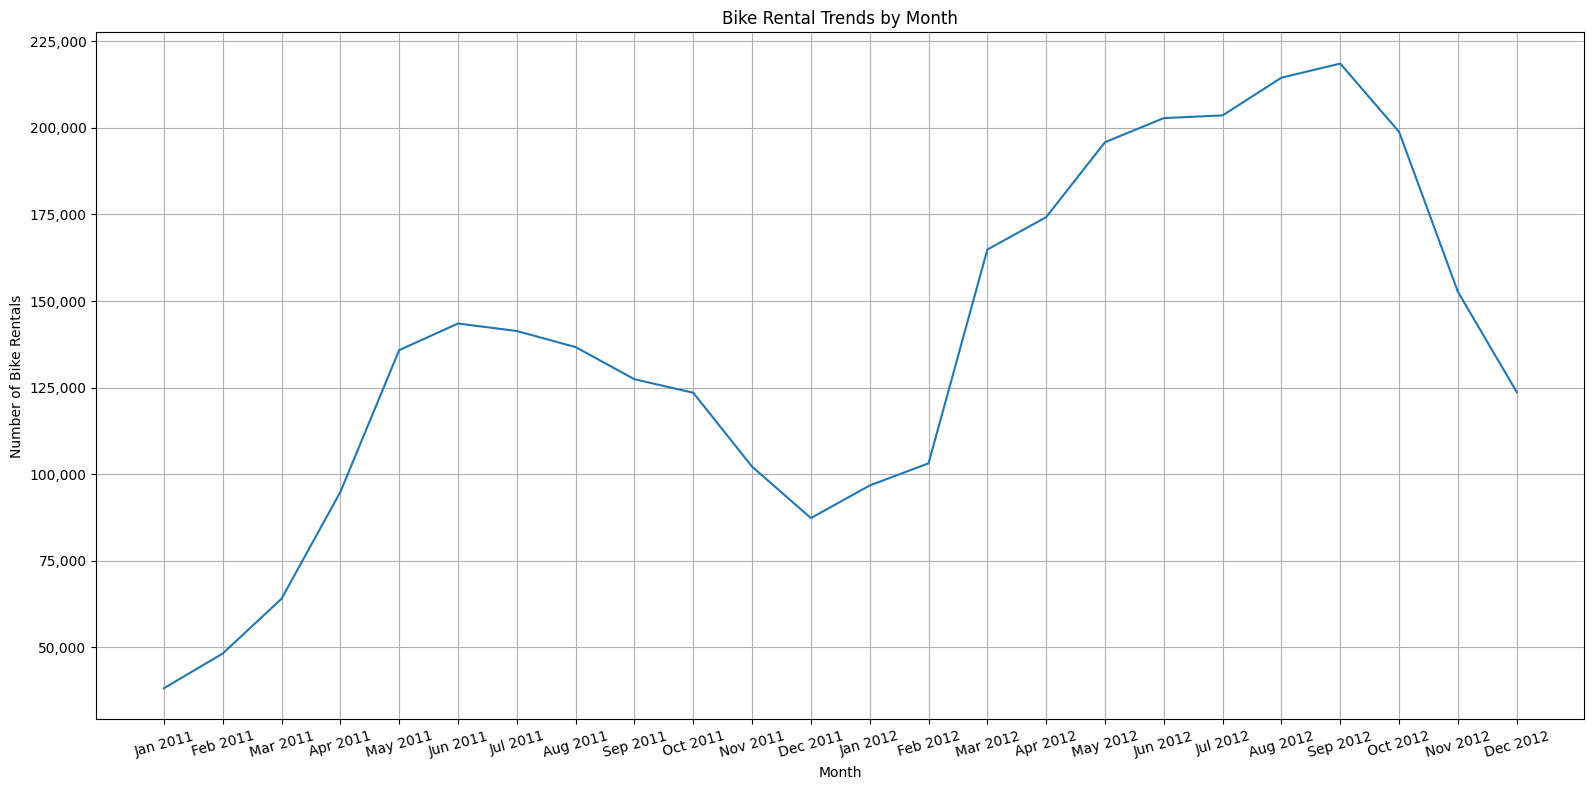

In [29]:
monthly_df = day_df.resample("M", on="dteday").sum()
monthly_df = monthly_df.reset_index()

monthly_df["dteday"] = ["Jan 2011", "Feb 2011", "Mar 2011",
                        "Apr 2011", "May 2011", "Jun 2011",
                        "Jul 2011", "Aug 2011", "Sep 2011",
                        "Oct 2011", "Nov 2011", "Dec 2011",
                        "Jan 2012", "Feb 2012", "Mar 2012",
                        "Apr 2012", "May 2012", "Jun 2012",
                        "Jul 2012", "Aug 2012", "Sep 2012",
                        "Oct 2012", "Nov 2012", "Dec 2012"]

plt.figure(figsize=(16, 8))
plt.plot(monthly_df["dteday"], monthly_df["cnt"])

plt.title("Bike Rental Trends by Month")
plt.xlabel("Month")
plt.ylabel("Number of Bike Rentals")

plt.xticks(rotation=15)
plt.grid(True)
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(
    plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}")
)
plt.show()

### Question 4: Pada musim apa penyewaan sepeda mengalami permintaan paling banyak dan paling sedikit?

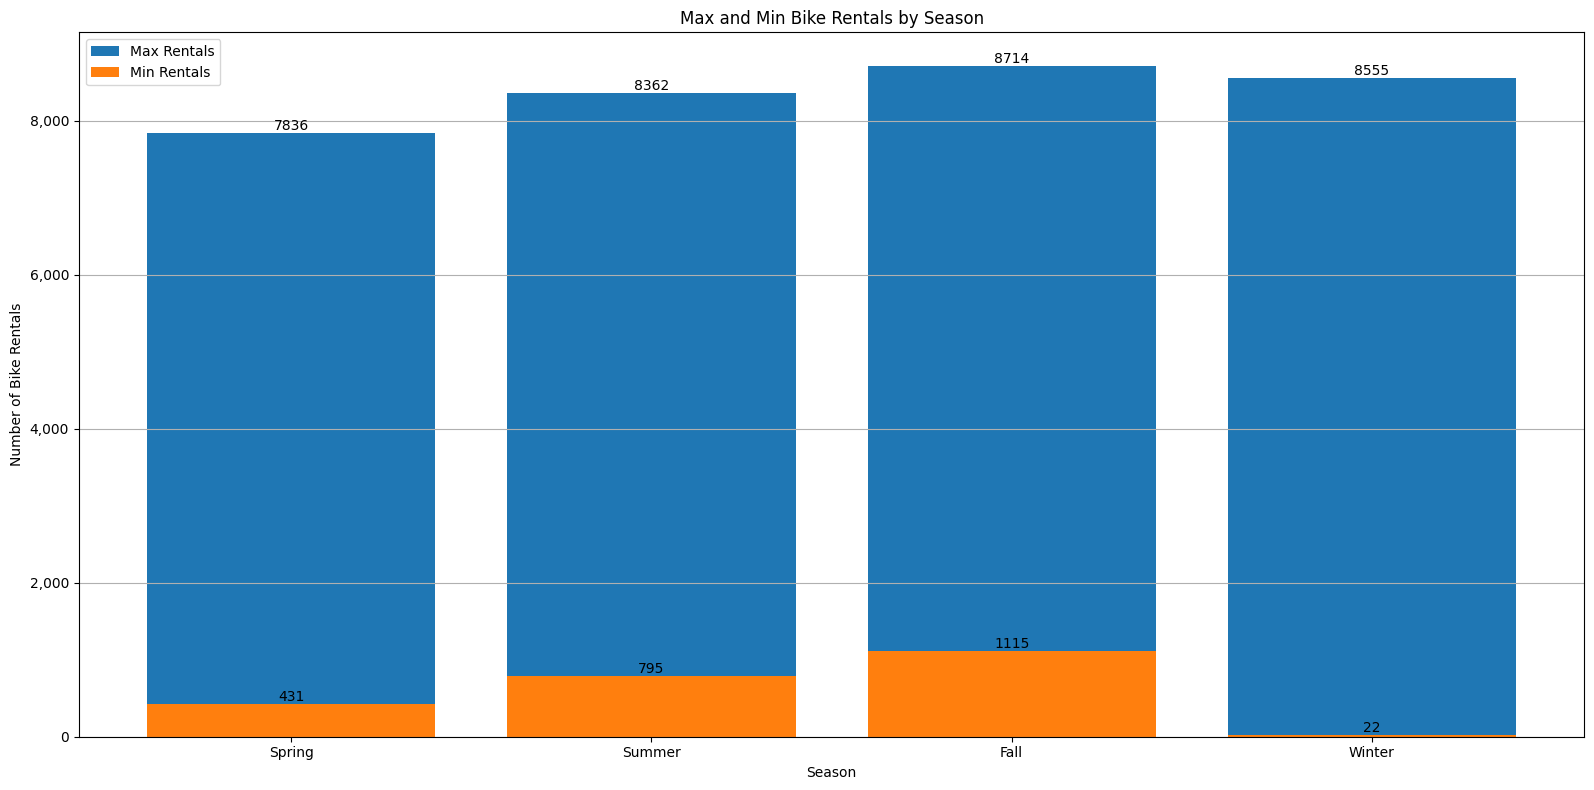

In [30]:
seasonally_agg = day_df.groupby("season").agg({
    "instant": "nunique",
    "cnt": ["max", "min"]
})
seasonally_agg = seasonally_agg.reset_index()

seasonally_agg["season"] = ["Spring", "Summer", "Fall", "Winter"]

plt.figure(figsize=(16, 8))
plt.bar(seasonally_agg["season"],
        seasonally_agg[("cnt", "max")],
        label="Max Rentals")
plt.bar(seasonally_agg["season"],
        seasonally_agg[("cnt", "min")],
        label="Min Rentals")

for i in range(len(seasonally_agg["season"])):
    plt.text(i, seasonally_agg[("cnt", "max")][i],
             str(seasonally_agg[("cnt", "max")][i]),
             ha="center", va="bottom")
    plt.text(i, seasonally_agg[("cnt", "min")][i],
             str(seasonally_agg[("cnt", "min")][i]),
             ha="center", va="bottom")

plt.title("Max and Min Bike Rentals by Season")
plt.xlabel("Season")
plt.ylabel("Number of Bike Rentals")

plt.legend(loc="upper left")
plt.grid(axis="y")
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(
    plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}")
)
plt.show()

### Question 5: Pada bulan apa penyewaan sepeda mengalami permintaan paling banyak dan paling sedikit?

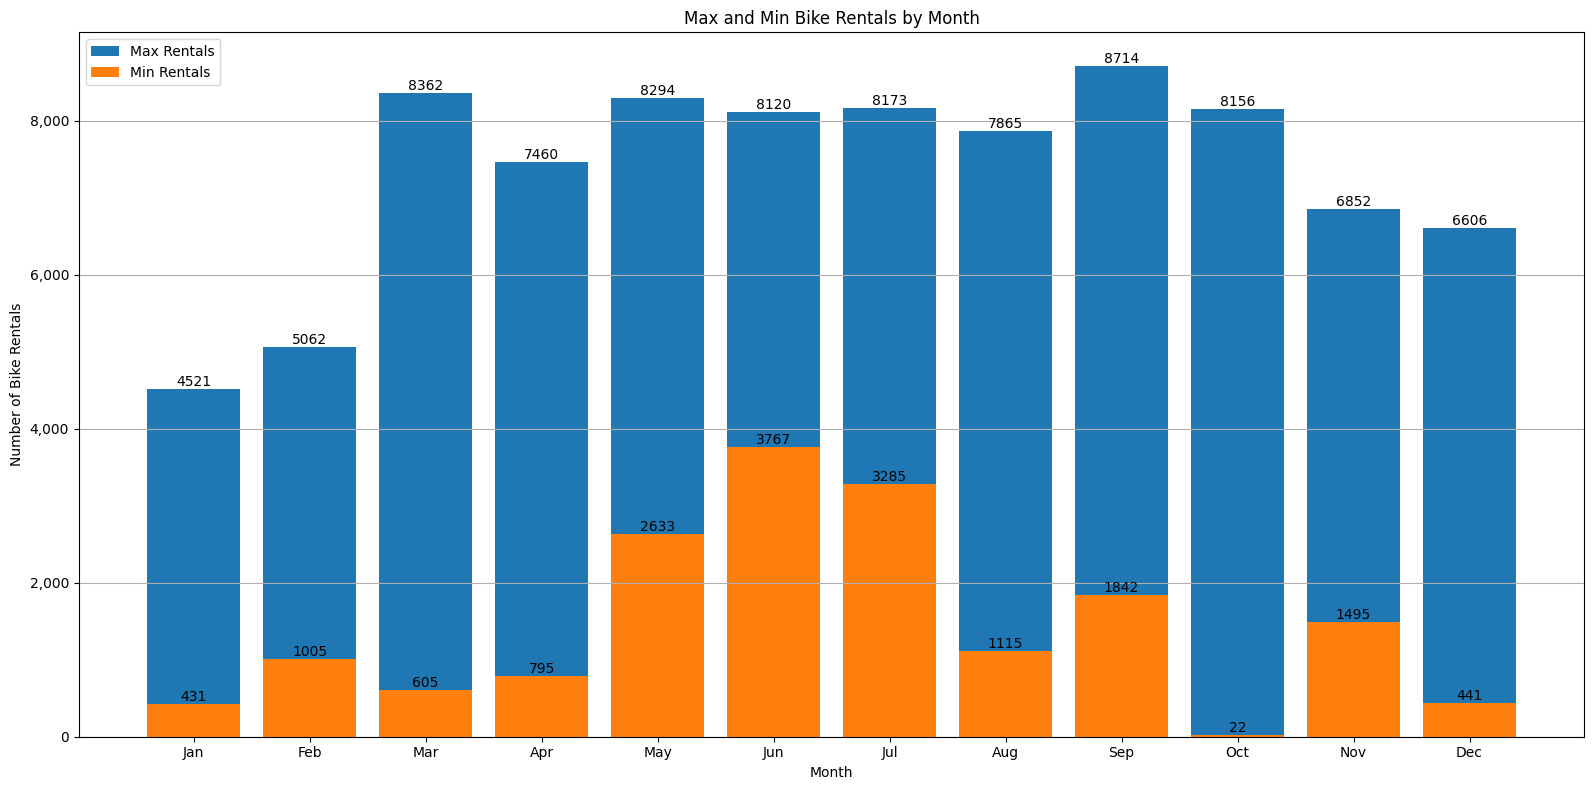

In [31]:
monthly_agg = day_df.groupby("mnth").agg({
    "instant": "nunique",
    "cnt": ["max", "min"]
})
monthly_agg = monthly_agg.reset_index()

monthly_agg["mnth"] = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.figure(figsize=(16, 8))
plt.bar(monthly_agg["mnth"],
        monthly_agg[("cnt", "max")],
        label="Max Rentals")
plt.bar(monthly_agg["mnth"],
        monthly_agg[("cnt", "min")],
        label="Min Rentals")

for i in range(len(monthly_agg["mnth"])):
    plt.text(i, monthly_agg[("cnt", "max")][i],
             str(monthly_agg[("cnt", "max")][i]),
             ha="center", va="bottom")
    plt.text(i, monthly_agg[("cnt", "min")][i],
             str(monthly_agg[("cnt", "min")][i]),
             ha="center", va="bottom")

plt.title("Max and Min Bike Rentals by Month")
plt.xlabel("Month")
plt.ylabel("Number of Bike Rentals")

plt.legend(loc="upper left")
plt.grid(axis="y")
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(
    plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}")
)
plt.show()

### Question 6: Pada hari kerja atau akhir pekan penyewaan sepeda mengalami permintaan paling banyak dan paling sedikit?

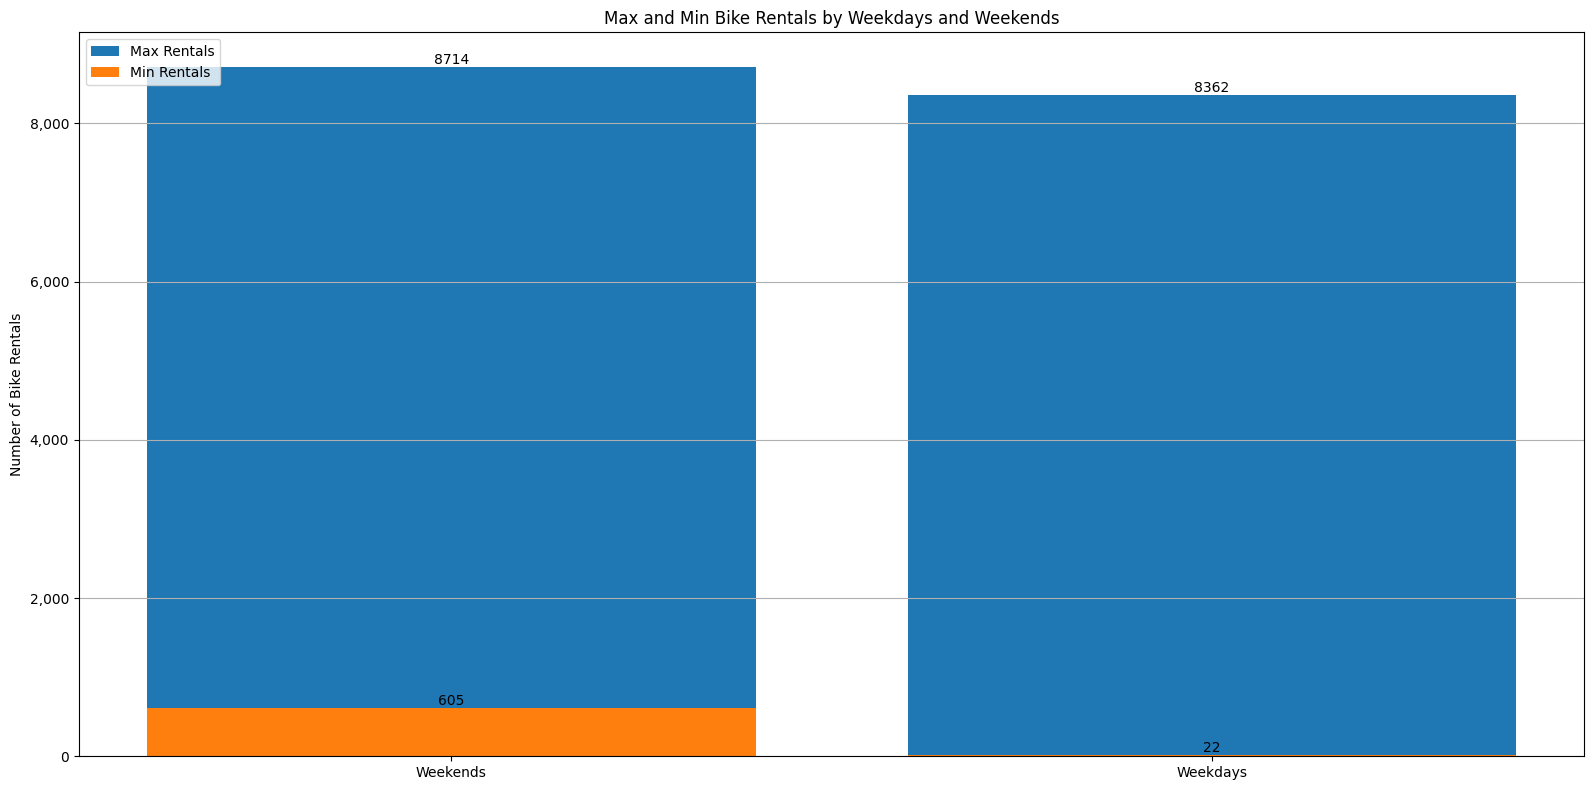

In [32]:
weekdays_or_weekends_agg = day_df.groupby("workingday").agg({
    "instant": "nunique",
    "cnt": ["max", "min"]
})
weekdays_or_weekends_agg = weekdays_or_weekends_agg.reset_index()

weekdays_or_weekends_agg["workingday"] = ["Weekends", "Weekdays"]

plt.figure(figsize=(16, 8))
plt.bar(weekdays_or_weekends_agg["workingday"],
        weekdays_or_weekends_agg[("cnt", "max")],
        label="Max Rentals")
plt.bar(weekdays_or_weekends_agg["workingday"],
        weekdays_or_weekends_agg[("cnt", "min")],
        label="Min Rentals")

for i in range(len(weekdays_or_weekends_agg["workingday"])):
    plt.text(i, weekdays_or_weekends_agg[("cnt", "max")][i],
             str(weekdays_or_weekends_agg[("cnt", "max")][i]),
             ha="center", va="bottom")
    plt.text(i, weekdays_or_weekends_agg[("cnt", "min")][i],
             str(weekdays_or_weekends_agg[("cnt", "min")][i]),
             ha="center", va="bottom")

plt.title("Max and Min Bike Rentals by Weekdays and Weekends")
plt.ylabel("Number of Bike Rentals")

plt.legend(loc="upper left")
plt.grid(axis="y")
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(
    plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}")
)
plt.show()

### Question 7: Pada hari libur atau bukan penyewaan sepeda mengalami permintaan paling banyak dan paling sedikit?

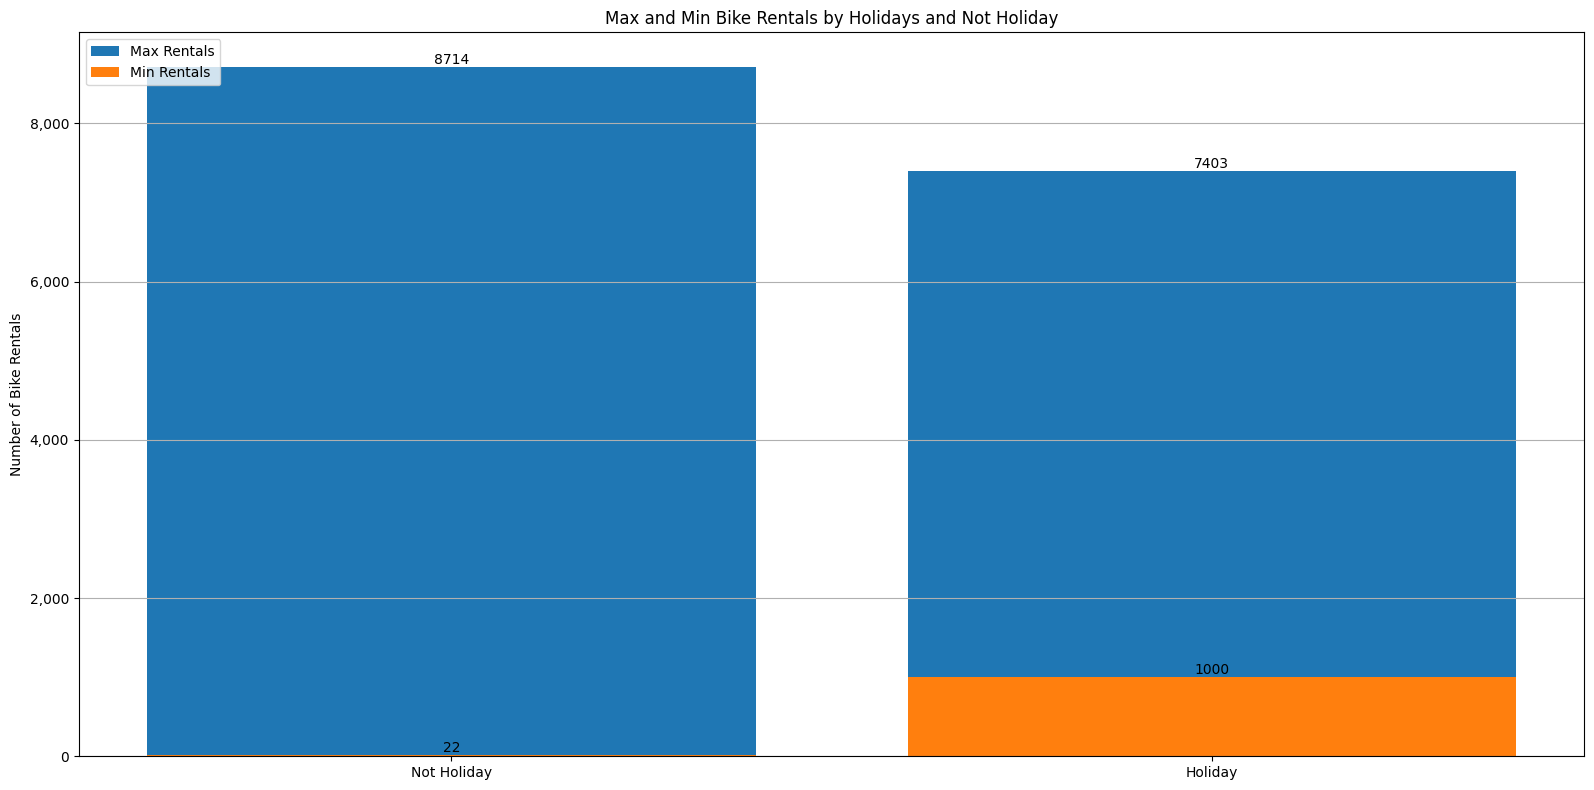

In [33]:
holiday_agg = day_df.groupby("holiday").agg({
    "instant": "nunique",
    "cnt": ["max", "min"]
})
holiday_agg = holiday_agg.reset_index()

holiday_agg["holiday"] = ["Not Holiday", "Holiday"]

plt.figure(figsize=(16, 8))
plt.bar(holiday_agg["holiday"],
        holiday_agg[("cnt", "max")],
        label="Max Rentals")
plt.bar(holiday_agg["holiday"],
        holiday_agg[("cnt", "min")],
        label="Min Rentals")

for i in range(len(holiday_agg["holiday"])):
    plt.text(i, holiday_agg[("cnt", "max")][i],
             str(holiday_agg[("cnt", "max")][i]),
             ha="center", va="bottom")
    plt.text(i, holiday_agg[("cnt", "min")][i],
             str(holiday_agg[("cnt", "min")][i]),
             ha="center", va="bottom")

plt.title("Max and Min Bike Rentals by Holidays and Not Holiday")
plt.ylabel("Number of Bike Rentals")

plt.legend(loc="upper left")
plt.grid(axis="y")
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(
    plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}")
)
plt.show()

### Question 8: Pada hari apa penyewaan sepeda mengalami permintaan paling banyak dan paling sedikit?

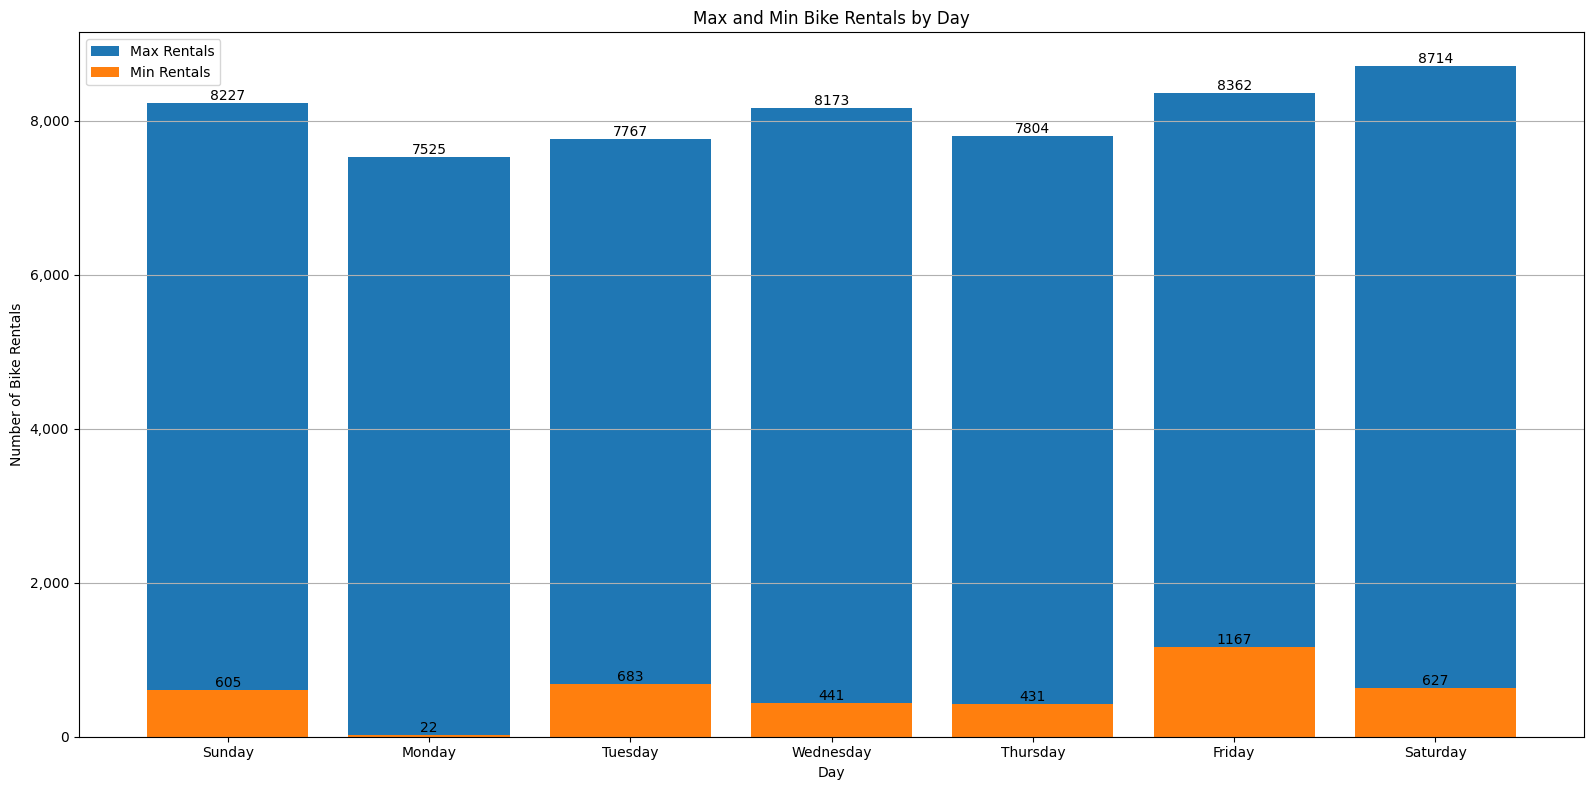

In [34]:
daily_agg = day_df.groupby("weekday").agg({
    "instant": "nunique",
    "cnt": ["max", "min"]
})
daily_agg = daily_agg.reset_index()

daily_agg["weekday"] = ["Sunday", "Monday", "Tuesday", "Wednesday",
                        "Thursday", "Friday", "Saturday"]

plt.figure(figsize=(16, 8))
plt.bar(daily_agg["weekday"],
        daily_agg[("cnt", "max")],
        label="Max Rentals")
plt.bar(daily_agg["weekday"],
        daily_agg[("cnt", "min")],
        label="Min Rentals")

for i in range(len(daily_agg["weekday"])):
    plt.text(i, daily_agg[("cnt", "max")][i],
             str(daily_agg[("cnt", "max")][i]),
             ha="center", va="bottom")
    plt.text(i, daily_agg[("cnt", "min")][i],
             str(daily_agg[("cnt", "min")][i]),
             ha="center", va="bottom")

plt.title("Max and Min Bike Rentals by Day")
plt.xlabel("Day")
plt.ylabel("Number of Bike Rentals")

plt.legend(loc="upper left")
plt.grid(axis="y")
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(
    plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}")
)
plt.show()

### Question 9: Pada cuaca apa penyewaan sepeda mengalami permintaan paling banyak dan paling sedikit?

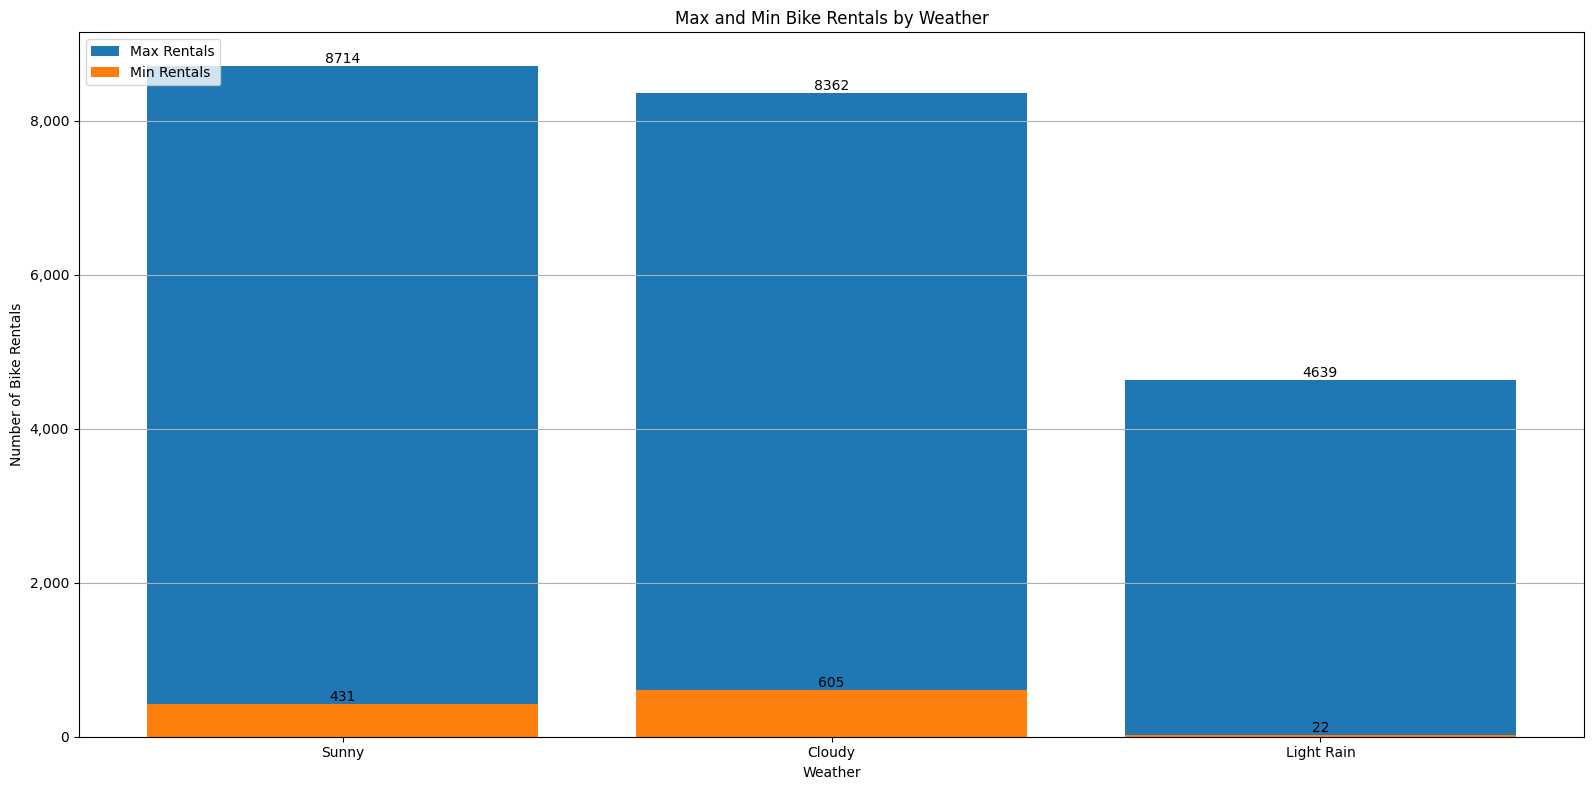

In [35]:
weather_agg = day_df.groupby("weathersit").agg({
    "instant": "nunique",
    "cnt": ["max", "min"]
})
weather_agg = weather_agg.reset_index()

weather_agg["weathersit"] = ["Sunny", "Cloudy", "Light Rain"]

plt.figure(figsize=(16, 8))
plt.bar(weather_agg["weathersit"],
        weather_agg[("cnt", "max")],
        label="Max Rentals")
plt.bar(weather_agg["weathersit"],
        weather_agg[("cnt", "min")],
        label="Min Rentals")

for i in range(len(weather_agg["weathersit"])):
    plt.text(i, weather_agg[("cnt", "max")][i],
             str(weather_agg[("cnt", "max")][i]),
             ha="center", va="bottom")
    plt.text(i, weather_agg[("cnt", "min")][i],
             str(weather_agg[("cnt", "min")][i]),
             ha="center", va="bottom")

plt.title("Max and Min Bike Rentals by Weather")
plt.xlabel('Weather')
plt.ylabel("Number of Bike Rentals")

plt.legend(loc="upper left")
plt.grid(axis="y")
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(
    plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}")
)
plt.show()

### Question 10: Pada jam berapa penyewaan sepeda mengalami permintaan paling banyak dan paling sedikit?

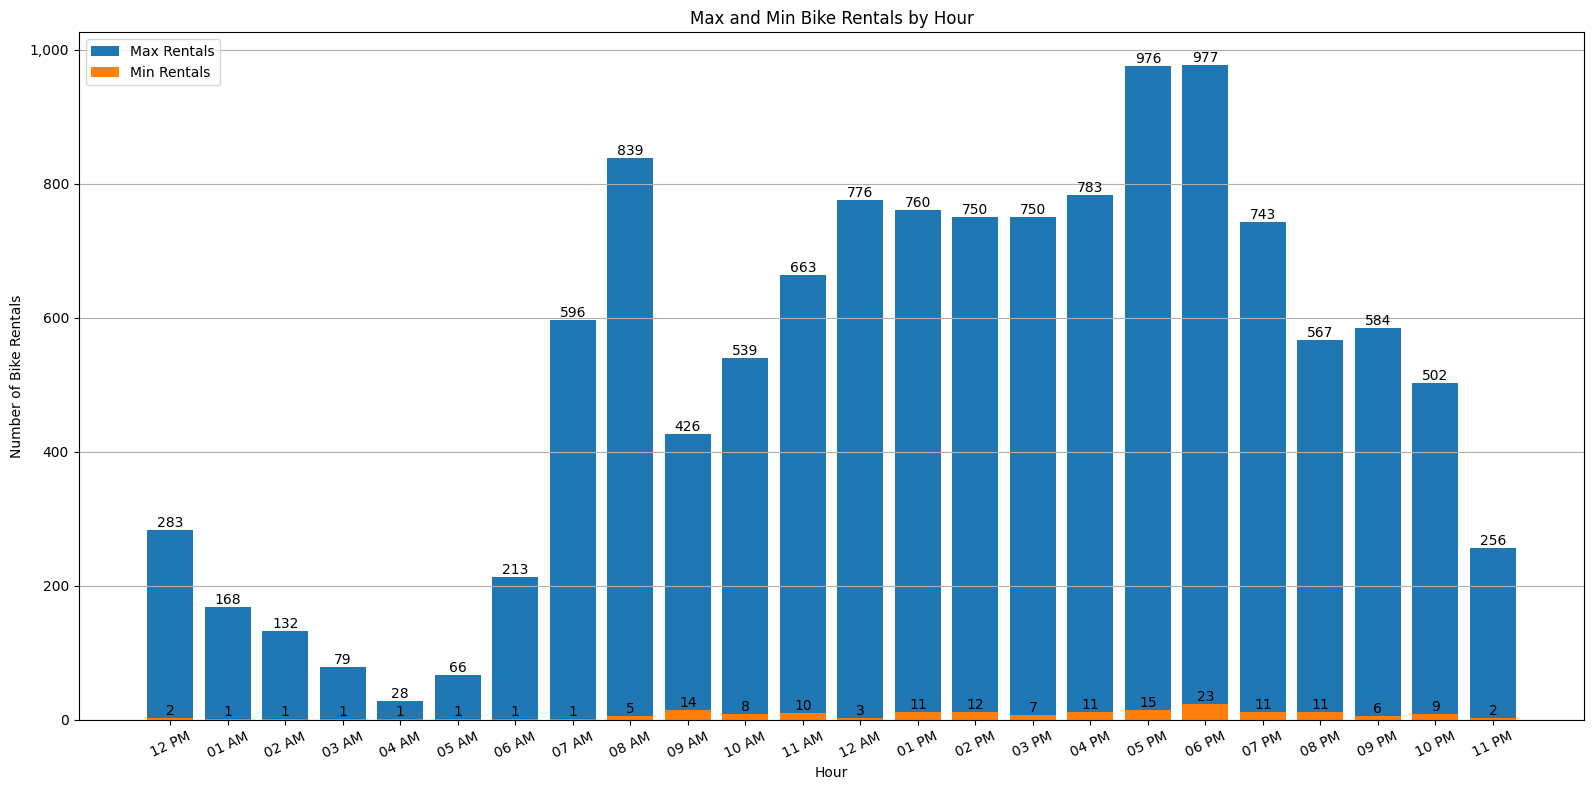

In [36]:
hourly_agg = hour_df.groupby("hr").agg({
    "instant": "nunique",
    "cnt": ["max", "min"]
})
hourly_agg = hourly_agg.reset_index()

hourly_agg["hr"] = ["12 PM", "01 AM", "02 AM", "03 AM", "04 AM", "05 AM",
                    "06 AM", "07 AM", "08 AM", "09 AM", "10 AM", "11 AM",
                    "12 AM", "01 PM", "02 PM", "03 PM", "04 PM", "05 PM",
                    "06 PM", "07 PM", "08 PM", "09 PM", "10 PM", "11 PM"]

plt.figure(figsize=(16, 8))
plt.bar(hourly_agg["hr"],
        hourly_agg[("cnt", "max")],
        label="Max Rentals")
plt.bar(hourly_agg["hr"],
        hourly_agg[("cnt", "min")],
        label="Min Rentals")

for i in range(len(hourly_agg["hr"])):
    plt.text(i, hourly_agg[("cnt", "max")][i],
             str(hourly_agg[("cnt", "max")][i]),
             ha="center", va="bottom")
    plt.text(i, hourly_agg[("cnt", "min")][i],
             str(hourly_agg[("cnt", "min")][i]),
             ha="center", va="bottom")

plt.title("Max and Min Bike Rentals by Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Bike Rentals")

plt.legend(loc="upper left")
plt.xticks(rotation=25)
plt.grid(axis="y")
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(
    plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}")
)
plt.show()

### Question 11: Apa tipe pengguna paling banyak dalam penyewaan sepeda?

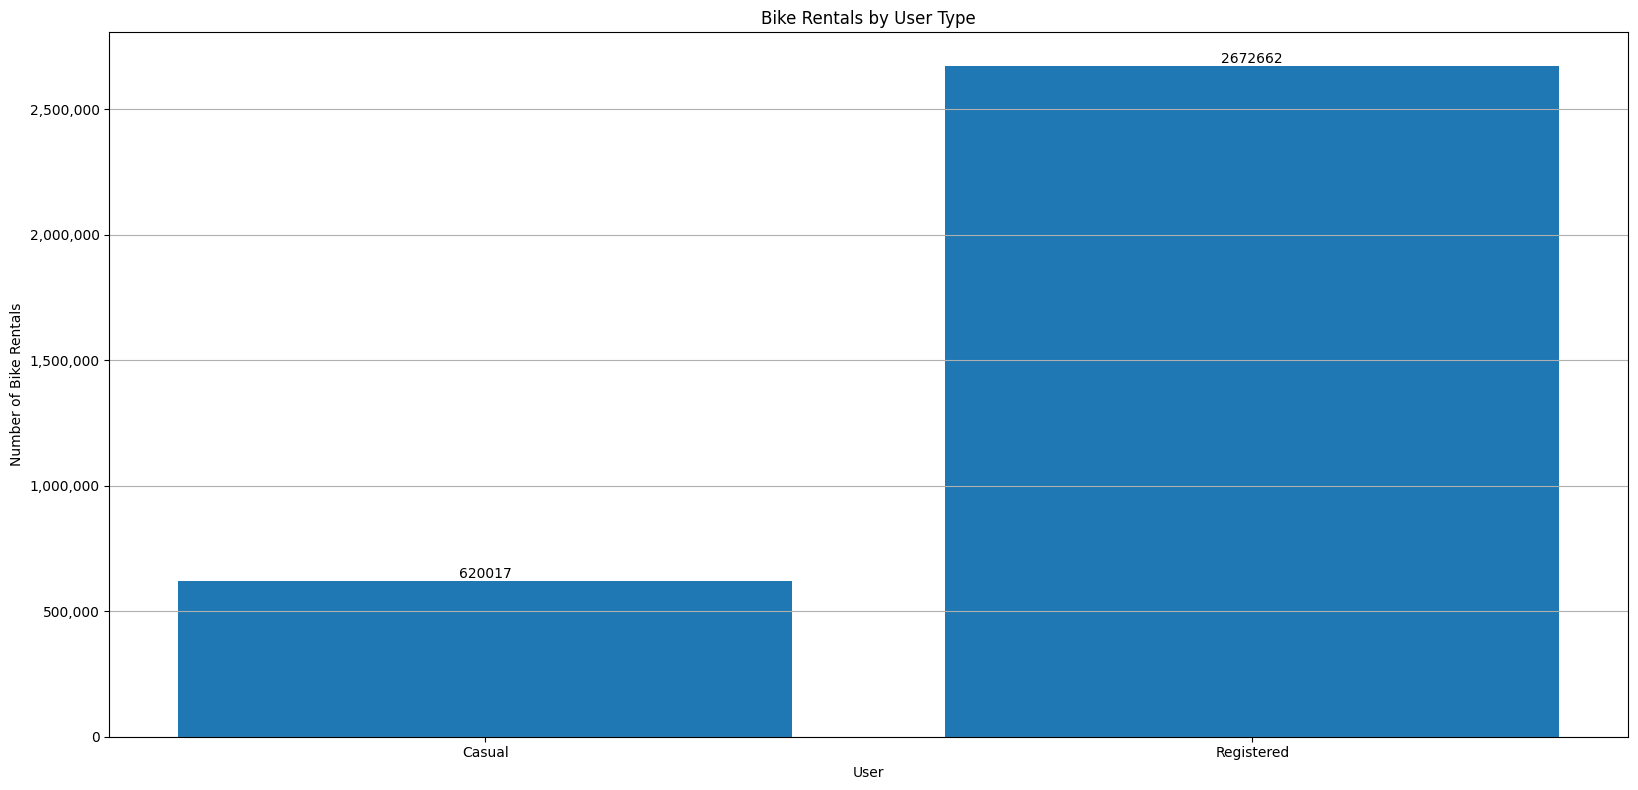

In [37]:
users = ["Casual", "Registered"]

plt.figure(figsize=(16, 8))
plt.bar(users, day_df[["casual", "registered"]].sum())

for i in range(len(users)):
    plt.text(i, day_df[["casual", "registered"]].sum()[i],
             str(day_df[["casual", "registered"]].sum()[i]),
             ha="center", va="bottom")

plt.title("Bike Rentals by User Type")
plt.xlabel("User")
plt.ylabel("Number of Bike Rentals")

plt.grid(axis="y")
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(
    plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}")
)
plt.show()

## Conclusion

- **Conclution Question 1**: Terjadi kenaikan yang sangat masif, hal ini menandakan permintaan penyewaan sepeda mengalami peningkatan dari tahun ke tahun.
- **Conclution Question 2**: Ternyata terjadi kenaikan dan penurunan jika dilihat berdasarkan kuartal.
- **Conclution Question 3**: Terjadi kenaikan dan penurunan yang sangat signifikan dan hal tersebut terlihat lebih jelas jika dilihat berdasarkan bulan.
- **Conclution Question 4**: Permintaan paling banyak ada pada **musim gugur** yaitu sebesar **8714**, sedangkan permintaan paling sedikit ada pada **musim dingin** yaitu sebesar **22**
- **Conclution Question 5**: Permintaan paling banyak ada pada **bulan september** yaitu sebesar **8714**, sedangkan permintaan paling sedikit ada pada **bulan oktober** yaitu sebesar **22**
- **Conclution Question 6**: Permintaan paling banyak ada pada **akhir pekan** yaitu sebesar **8714**, sedangkan permintaan paling sedikit ada pada **hari kerja** yaitu sebesar **22**
- **Conclution Question 7**: Permintaan paling banyak ada pada **bukan hari libur** yaitu sebesar **8714**, sedangkan permintaan paling sedikit ada pada **bukan hari libur** juga yaitu sebesar **22**
- **Conclution Question 8**: Permintaan paling banyak ada pada **hari sabtu** yaitu sebesar **8714**, sedangkan permintaan paling sedikit ada pada **hari senin** juga yaitu sebesar **22**
- **Conclution Question 9**: Permintaan paling banyak ada pada **cuaca cerah** yaitu sebesar **8714**, sedangkan permintaan paling sedikit ada pada **cuaca hujan ringan** juga yaitu sebesar **22**
- **Conclution Question 10**: Permintaan paling banyak ada pada **jam 6 sore** yaitu sebesar **977**, sedangkan permintaan paling sedikit ada pada **jam 1 sampai jam 7 pagi** juga yaitu sebesar **1**
- **Conclution Question 11**: Tipe pengguna paling banyak ada pada pengguna yang terdaftar